In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 516.3 MB 6.4 kB/s  eta 0:00:01   |██                              | 33.3 MB 1.7 MB/s eta 0:04:45     |███▎                            | 52.1 MB 1.6 MB/s eta 0:04:52     |█████▊                          | 93.2 MB 10.4 MB/s eta 0:00:41     |██████                          | 96.0 MB 10.4 MB/s eta 0:00:41     |██████▎                         | 102.1 MB 1.7 MB/s eta 0:04:01     |██████▍                         | 103.8 MB 9.9 MB/s eta 0:00:42     |███████▍                        | 118.9 MB 1.7

     |████████████████████████████████| 3.0 MB 9.4 MB/s eta 0:00:01                           | 471 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 11.2 MB/s eta 0:00:01�█▊ | 1.2 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 5.4 MB/s eta 0:00:011
     |████████████████████████████████| 777 kB 7.2 MB/s eta 0:00:01
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
     |████████████████████████████████| 89 kB 6.6 MB/s eta 0:00:011
     |████████████████████████████████| 155 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 3.5 MB/s eta 0:00:011
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=78507 sha256=f41fd5116e540728f97d502961fef3ea6657a54ced2547d85c7e5532ec12fc06
  Stored in directory: /home/kristoffer/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for absl-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import keras

Using TensorFlow backend.


In [2]:
!ls


ratings.csv  regression_model.h5  Untitled.ipynb


In [3]:
df = pd.read_csv('ratings.csv')

In [4]:
df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
#data set is already cleaned so no need for preprocessing


In [6]:
from sklearn.model_selection import train_test_split
seed = 42 #get same random output for multiple training

In [7]:
#5-k fold cross validation

In [8]:
train, test = train_test_split(df, random_state=seed, test_size=0.2) 

In [9]:
train.shape

(785404, 3)

In [10]:
test.shape

(196352, 3)

In [11]:
n_users = len(df.user_id.unique())
n_books = len(df.book_id.unique())

In [12]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

Input: Input for both books and users <br/>
Embedding Layers: Embeddings for books and users <br/>
Dot: combines embeddings using a dot product <br/>

In [13]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Book-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Book-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      User-Input[0][0]                 
____________________________________________________________________________________________

In [14]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
model.save('regression_model.h5')

/home/kristoffer/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Epoch 1/10
785404/785404 [==============================] - 109s 138us/step - loss: 14.1977
Epoch 2/10
785404/785404 [==============================] - 82s 104us/step - loss: 5.7269
Epoch 3/10
785404/785404 [==============================] - 116s 147us/step - loss: 2.2606
Epoch 4/10
785404/785404 [==============================] - 126s 160us/step - loss: 1.4125
Epoch 5/10
785404/785404 [==============================] - 127s 162us/step - loss: 1.0805
Epoch 6/10
785404/785404 [==============================] - 146s 186us/step - loss: 0.9113
Epoch 7/10
785404/785404 [==============================] - 133s 169us/step - loss: 0.8133
Epoch 8/10
785404/785404 [==============================] - 98s 125us/step - loss: 0.7512
Epoch 9/10
785404/785404 [==============================] - 72s 91us/step - loss: 0.7095
Epoch 10/10
785404/785404 [==============================] - 91s 116us/step - loss: 0.6799


In [15]:
history

In [16]:
loss = history.history['loss']

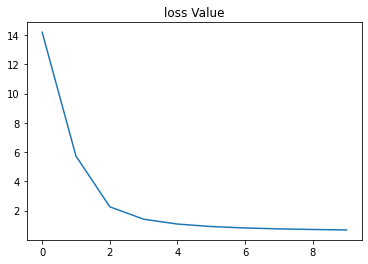

In [17]:
plt.title('loss Value')
plt.plot(loss)

In [18]:
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [19]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)


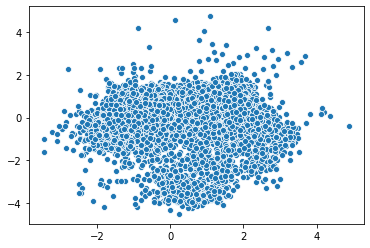

In [21]:
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [22]:
#Make a Principcal component analysis for users and books

In [23]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(df.book_id)))
user = np.array([1 for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
print(recommended_book_ids)
print(predictions[recommended_book_ids])

[8232 7843 9663 6883 9457]
[5.9399643 5.4594    5.3467426 5.247681  5.247151 ]


In [24]:
#Okay so using the principle component analysis we could 

In [55]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(df.book_id))) #get all unique book id's in a numpy array 
user = np.array([1 for i in range(len(book_data))]) # add 1 for each book as test data
predictions = model.predict([user, book_data]) #call the predict function on the model to get the predictions
predictions = np.array([a[0] for a in predictions]) #gloop thorugh predictions and get the value
recommended_book_ids = (-predictions).argsort()[:5] # returns the indices, for each of the places in an array, and then we index on it afterwads
print(recommended_book_ids)
print(predictions[recommended_book_ids])

[8232 7843 9663 6883 9457]
[5.9399643 5.4594    5.3467426 5.247681  5.247151 ]


In [30]:
np.unique(user)

array([1])

In [50]:
(-predictions).argsort()[:5]

array([8232, 7843, 9663, 6883, 9457])

In [39]:
book_df = pd.read_csv('books.csv')

In [40]:
book_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [47]:
book_df[book_df['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6882,6883,11488123,11488123,14558491,43,452297648,9.780452e+12,Natasha Solomons,2011.0,The House at Tyneford,...,14092,15698,1972,203,1006,4313,6673,3503,https://images.gr-assets.com/books/1377631578m...,https://images.gr-assets.com/books/1377631578s...
7842,7843,17182421,17182421,21762912,49,778315339,9.780778e+12,Jason Mott,2013.0,The Returned,...,11449,13269,2452,581,2122,5100,3798,1668,https://images.gr-assets.com/books/1372089735m...,https://images.gr-assets.com/books/1372089735s...
8231,8232,10395,10395,13106,31,60731427,9.780061e+12,Franklin Foer,2004.0,How Soccer Explains the World: An Unlikely The...,...,9231,9944,716,246,669,2794,3715,2520,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9456,9457,46908,46908,45979,12,1595324097,9.781595e+12,"Natsuki Takaya, Alethea Nibley, Athena Nibley",2004.0,フルーツバスケット 14,...,13072,13206,126,76,242,1425,3204,8259,https://images.gr-assets.com/books/1393736589m...,https://images.gr-assets.com/books/1393736589s...
9662,9663,137792,137792,1358863,34,7201095,9.780007e+12,Rebecca Wells,2005.0,Ya-Yas in Bloom,...,10200,11369,522,238,1123,3958,3648,2402,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
